In [30]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from matplotlib import rcParams
from matplotlib.cm import rainbow
from sklearn.preprocessing import LabelEncoder
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [7]:
df = pd.read_csv('heart.csv')
df['HeartDisease'].astype(float)


0      0.0
1      1.0
2      0.0
3      1.0
4      0.0
      ... 
913    1.0
914    1.0
915    1.0
916    1.0
917    0.0
Name: HeartDisease, Length: 918, dtype: float64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [10]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


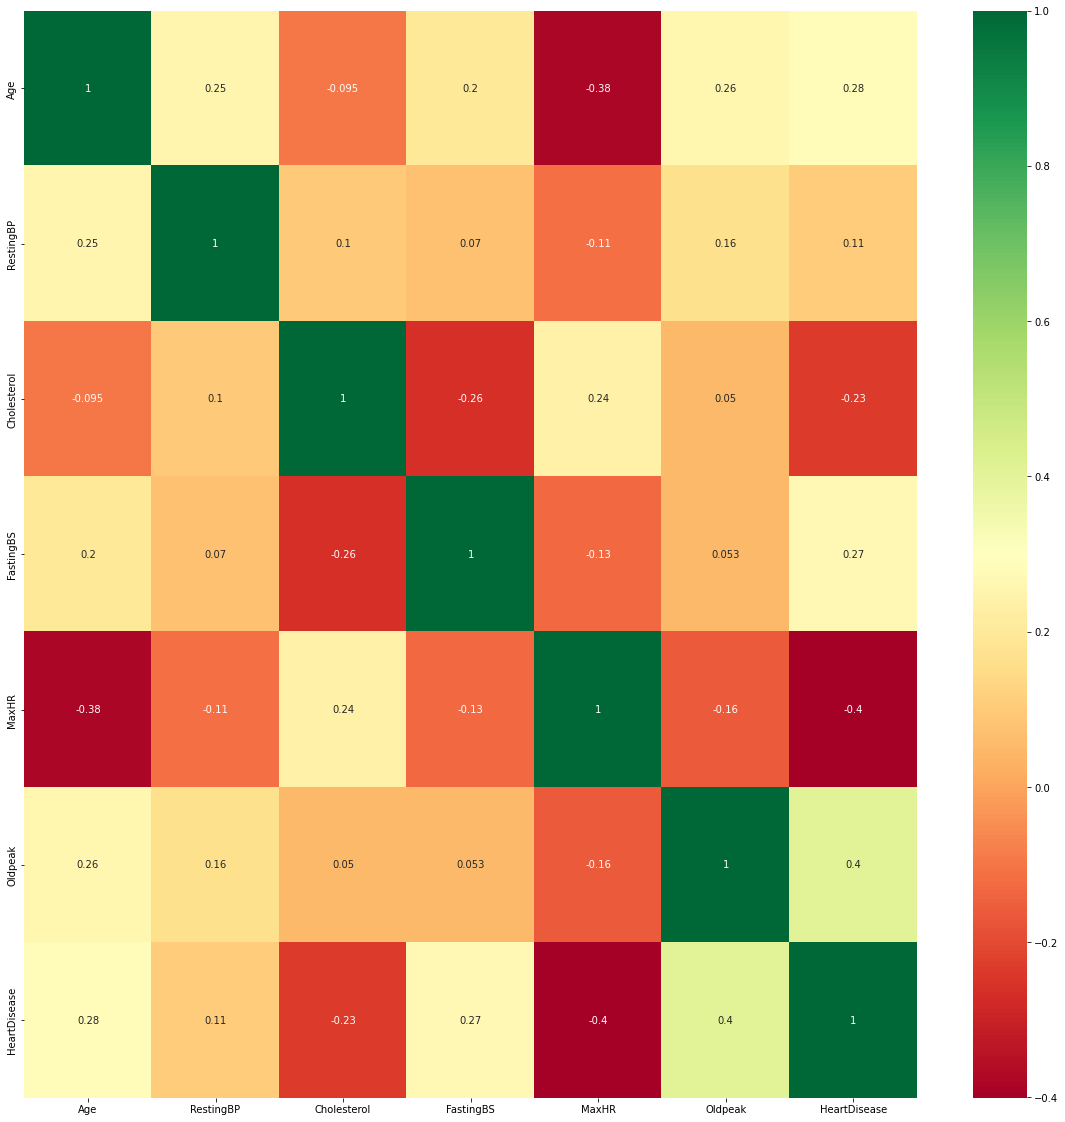

In [11]:
import seaborn as sns
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7faa7eaaafa0>,
      dtype=object)

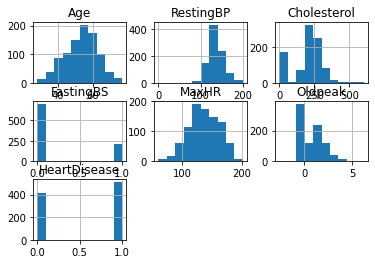

In [12]:
df.hist()

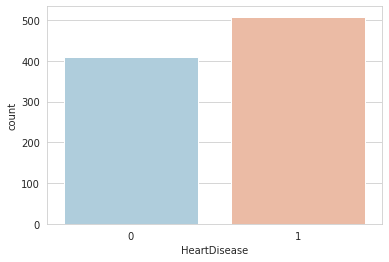

In [13]:
sns.set_style('whitegrid')
sns.countplot(x='HeartDisease',data=df,palette='RdBu_r')


In [14]:
dataset = pd.get_dummies(df, columns = ['Age','ExerciseAngina','Oldpeak','ChestPainType'])

In [20]:
Label_Encoder= LabelEncoder()
df['HeartDisease'] = Label_Encoder.fit_transform(df['HeartDisease'])
     

In [21]:
X=df.drop('HeartDisease',axis= 1)
Y = df['HeartDisease']

In [24]:
y=df[['HeartDisease']]


In [26]:

x=df[['ChestPainType','RestingBP','Cholesterol','MaxHR','ST_Slope']]

In [31]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size = 0.3)

In [32]:

from sklearn.metrics import accuracy_score


In [33]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

accuracy_rate=[]

for i in range(1,40):
    classifier= KNeighborsClassifier(n_neighbors =i)
    score = cross_val_score(classifier,X,Y,cv=10)
    accuracy_rate.append(score.mean())

Text(0, 0.5, 'Accuracy_Rate')

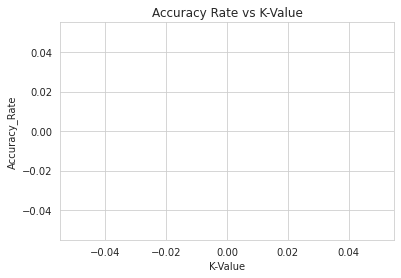

In [34]:
plt.plot(range(1,40),accuracy_rate, color= 'green',linestyle = 'dashed',marker='*', markersize=10)
plt.title('Accuracy Rate vs K-Value')
plt.xlabel('K-Value')
plt.ylabel('Accuracy_Rate')